## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into multiple DFs and visulize it. 

* We get an initial overview of the data and their anomalies. 
* We select the relevant points for the upcoming tasks and compare them in different situations.
* We carry out an initial univariate outlier detection, in which we identify and visualize abnormalities.

Requirements
* .csv-Files

In [30]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Task-2c: Evalutation 

> Test  quality from the extracted data - plausibility checks shall be performed checking
* The absolute values for each keypoint (outliers ?)
* The values for each keypoint over time (anomalies?)
* The values for each keypoint relative to other keypoints (anomalies ?)


> Für das endgültige Ziel, einen passenden Laufschuh für jede Laufart zu finden, müssen die Daten wie folgt aufbereitet werden:
* Für jedes Video Außreisser finden und beseitigen
* Folge: Jeder Dataframe je Video hat unterschidlich viele Werte, da die Außreisser unterschiedlich sein werden
* Jede Laufgeschwindigkeit hat 2 Videos (Perspektiven) und somit je zwei Werte zu denseleben Keypoints. Diese müssen zu einem gemeinsamen Wert verrechnet werden.

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [31]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    if "Joggen" in pre:
        df = pd.read_csv(file)
        df_dict_all[pre] = df
        if len(df) < 1798:
            print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

10 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
737590 DataCells


* 10 Runner
* 3 paces per runner
* 2 perspectives per pace 
> 10 x 3 x 2 = 60 Dataframes


* 1800 Frames per Dataframe --> 1800 Frames / 60 seconds = 30 Frames per Second
* 132 Columns per Dataframe --> 33 Pivot points x 4 Columns per Pivotpoint


> Für die 33 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 



In [32]:
df = df_dict_all["Joggen_9"]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.601104,0.549161,0.166282,0.000749,0.610273,0.545806,0.052190,0.003294,0.668903,...,0.417774,0.111347,0.809509,0.230790,0.662529,0.024180,0.481616,0.217305,0.585470,0.103777
1,0,0.610172,0.549519,0.185860,0.000755,0.601629,0.547540,0.081467,0.003238,0.691634,...,0.417777,0.116269,0.832532,0.229803,0.576750,0.027032,0.471164,0.219049,0.568987,0.118086
2,-1,0.613952,0.548747,0.201966,0.000730,0.601917,0.547517,0.084603,0.003181,0.693719,...,0.400923,0.121821,0.874619,0.232987,0.589757,0.027933,0.429593,0.222552,0.555899,0.129099
3,-2,0.613225,0.546067,0.205708,0.000705,0.602473,0.546148,0.097925,0.003100,0.663526,...,0.379716,0.123426,0.661006,0.218204,0.561238,0.026706,0.547211,0.222436,0.535516,0.128752
4,-3,0.609645,0.544869,0.223689,0.000677,0.627589,0.544153,0.096788,0.002860,0.624632,...,0.329060,0.123094,0.381332,0.225449,0.545302,0.025528,0.805660,0.224328,0.461138,0.122107


### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [40]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="y_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="y_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [38]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

# x == z
# y == y
# z == x
joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

In [35]:
# def calc_ankle(results, joint_list):
    
#     # Loop through hands
#     for hand in results.multi_hand_landmarks:
#         #Loop through joint sets 
#         for joint in joint_list:
#             a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
#             b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
#             c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
#             radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
#             angle = np.abs(radians*180.0/np.pi)


# joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18]]
# # Loop through hands
# for hand in results.multi_hand_landmarks:
#     #Loop through joint sets 
#     for joint in joint_list:
#         a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
#         b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
#         c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
        
#         radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
#         angle = np.abs(radians*180.0/np.pi)

intersection point p0
theta= 4.862068235528923 ,theta in degree= 278.5759896004264 

intersection point p1
theta= 1.7204755819391293 ,theta in degree= 98.57598960042635 

intersection point p2
theta= 0.770661967035216 ,theta in degree= 44.15567814236805 

intersection point p3
theta= 3.9122546206250055 ,theta in degree= 224.15567814236783 



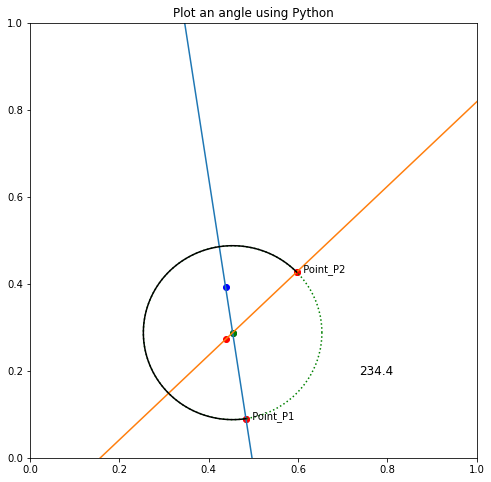

In [44]:
import matplotlib.pyplot as plt
import numpy as np

frame = 5

knee_x = df["z_left_knee"][frame]
knee_y = df["y_left_knee"][frame]

ankle_x = df["z_left_ankle"][frame]
ankle_y = df["y_left_ankle"][frame]

heel_x = df["z_left_heel"][frame]
heel_y = df["y_left_heel"][frame]

joints = {"knee": [knee_x, knee_y], "ankle": [ankle_x, ankle_y], "heel": [heel_x, heel_y]}
 
a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

l = np.linspace(-6, 6, 100)
 
plt.figure(figsize=(8, 8))

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Plot an angle using Python')
plt.plot(l, l*a1+b1)
plt.plot(l, l*a2+b2)
 
x0 = (b2-b1)/(a1-a2)
y0 = a1*x0 + b1
plt.scatter(x0, y0, color='midnightblue')

plt.scatter(knee_x, knee_y, color='blue')
plt.scatter(ankle_x, ankle_y, color='green')
plt.scatter(heel_x, heel_y, color='red')

###

theta = np.linspace(0, 2*np.pi, 100)
r = 0.2
x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0
plt.plot(x1, x2, color='green', linestyle='dotted')
 
x_points = []
y_points = []
 
def intersection_points(slope, intercept, x0, y0, radius):
    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return None
 
intersection_points(a1, b1, x0, y0, r)
intersection_points(a2, b2, x0, y0, r)
 
plt.scatter(x_points[0], y_points[0], color='crimson')
plt.scatter(x_points[2], y_points[2], color='crimson')
 
plt.text(x_points[0], y_points[0], '  Point_P1', color='black')
plt.text(x_points[2], y_points[2], '  Point_P2', color='black')
 
def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
 
    print('theta=', theta, ',theta in degree=', np.rad2deg(theta), '\n')
    return theta
 
theta_list = []
 
for i in range(len(x_points)):
    x = x_points[i]
    y = y_points[i]
 
    print('intersection point p{}'.format(i))
    theta_list.append(get_angle(x, y, x0, y0, r))
 
    
p1 = theta_list[0]
p2 = theta_list[2]
 
theta = np.linspace(p1, p2, 100)
 
x1 = r * np.cos(theta) + x0
x2 = r * np.sin(theta) + y0
 
plt.plot(x1, x2, color='black')
 
mid_angle = (p1 + p2) / 2.0
 
x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
 
angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)
 
plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
 
plt.scatter(x_points[0], y_points[0], color='red')
plt.scatter(x_points[2], y_points[2], color='red')
plt.show()

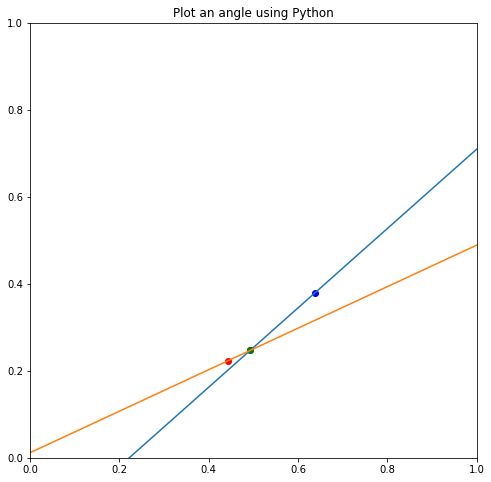

In [42]:
# import matplotlib.pyplot as plt
# import numpy as np

# frame = 10

# knee_x = df["x_left_knee"][frame]
# knee_y = df["y_left_knee"][frame]

# ankle_x = df["x_left_ankle"][frame]
# ankle_y = df["y_left_ankle"][frame]

# heel_x = df["x_left_heel"][frame]
# heel_y = df["y_left_heel"][frame]

# joints = {"knee": [knee_x, knee_y], "ankle": [ankle_x, ankle_y], "heel": [heel_x, heel_y]}
 
# a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
# a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x
 
# l = np.linspace(-6, 6, 100)
 
# plt.figure(figsize=(8, 8))

# plt.ylim(0, 1)
# plt.xlim(0, 1)
# plt.title('Plot an angle using Python')
# plt.plot(l, l*a1+b1)
# plt.plot(l, l*a2+b2)
 
# x0 = (b2-b1)/(a1-a2)
# y0 = a1*x0 + b1
# plt.scatter(x0, y0, color='midnightblue')

# plt.scatter(knee_x, knee_y, color='blue')
# plt.scatter(ankle_x, ankle_y, color='green')
# plt.scatter(heel_x, heel_y, color='red')

# ###